In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [64]:
df = pd.read_csv(r'/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [65]:
df.shape

(5572, 5)

#### 1. Data cleaning
#### 2. EDA
#### 3. Text Preprocessing
#### 4. Model building
#### 5. Evaluation
#### 6. Improvement
#### 7. Website
#### 8. Deploy

### DATA CLEANING

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [67]:
# drop last 3 cols
df = df.iloc[:,0:2]
df.sample(4)

,v1,v2
1099,ham,Been up to ne thing interesting. Did you have ...
4655,ham,"K, I'll work something out"
4871,ham,Hi dis is yijue i would be happy to work wif Ì...
2296,spam,<Forwarded from 21870000>Hi - this is your Mai...


In [68]:
#RENAMING COLUMN NAMES INTO MEANINGFUL
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(4)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


### DATA PREPROCESSING

In [69]:
#converting target column into 0,1
#APPLYING LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
x = df['target']
df['target'] = le.fit_transform(x)

In [71]:
df.head(4)
#ham -> 0
#spam -> 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [72]:
df.shape

(5572, 2)

In [73]:
#DATA CLEANING
# missing values check
df.isnull().sum()

target    0
text      0
dtype: int64

In [74]:
# check for duplicate values
df.duplicated().sum()

403

In [75]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [76]:
df.shape

(5169, 2)

### 2.EDA

In [77]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [78]:
df['target'].value_counts()
#The output shows the data is very imbalanced

target
0    4516
1     653
Name: count, dtype: int64

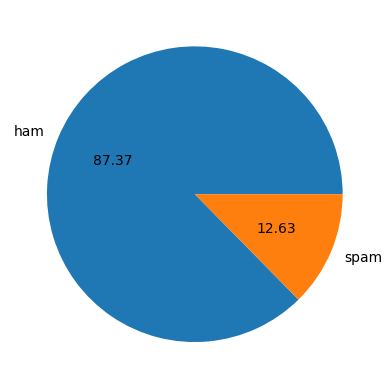

In [79]:
import matplotlib.pyplot as plt
x1 = df['target'].value_counts()
plt.pie(x1,labels= ['ham','spam'],autopct= "%0.2f")
plt.show()

In [80]:
import nltk

In [81]:
len(df['text'][0])  #len se number of words in text pta chl jata h 

111

In [82]:
df['no_of_characters'] = df['text'].apply(len)
df.head(4)

,target,text,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [83]:
#no of words in each text
def no_of_words(text):
    words = nltk.word_tokenize(text)

    return len(words)
        

In [84]:
no_of_words(df['text'][0])

24

In [85]:
df['no_of_words'] = df['text'].apply(no_of_words)

In [86]:
# no of sentences
def num_of_sentences(text):
    sentences = nltk.sent_tokenize(text)

    return len(sentences)

In [87]:
df['no_of_sentences'] = df['text'].apply(num_of_sentences)

In [ ]:
df.head()

In [88]:
lst = ['no_of_characters','no_of_words','no_of_sentences']
df[lst].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [89]:
#ham ke liye
mask = df['target'] == 0
df[mask][lst].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [90]:
#spam ke liye analysis
mask2= df['target'] == 1
df[mask2][lst].describe()

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [91]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_of_characters', ylabel='Count'>

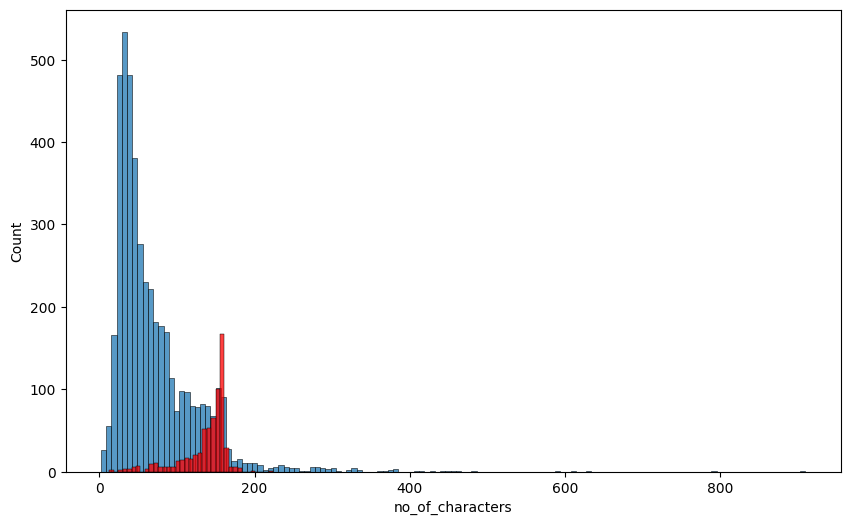

In [92]:
plt.figure(figsize= (10,6))
mask1 = df['target'] == 0
X1 = df[mask1]['no_of_characters']

mask2 = df['target'] == 1
X2 = df[mask2]['no_of_characters']

sns.histplot(X1)
sns.histplot(X2,color= 'red')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


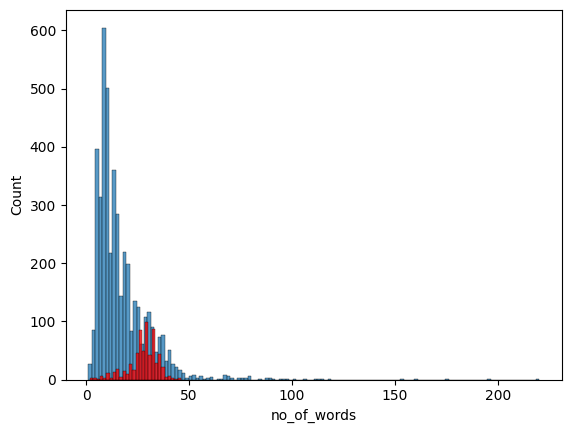

In [93]:
X3 = df[mask1]['no_of_words']
sns.histplot(X3)

X4 = df[mask2]['no_of_words']
sns.histplot(X4,color= 'red')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

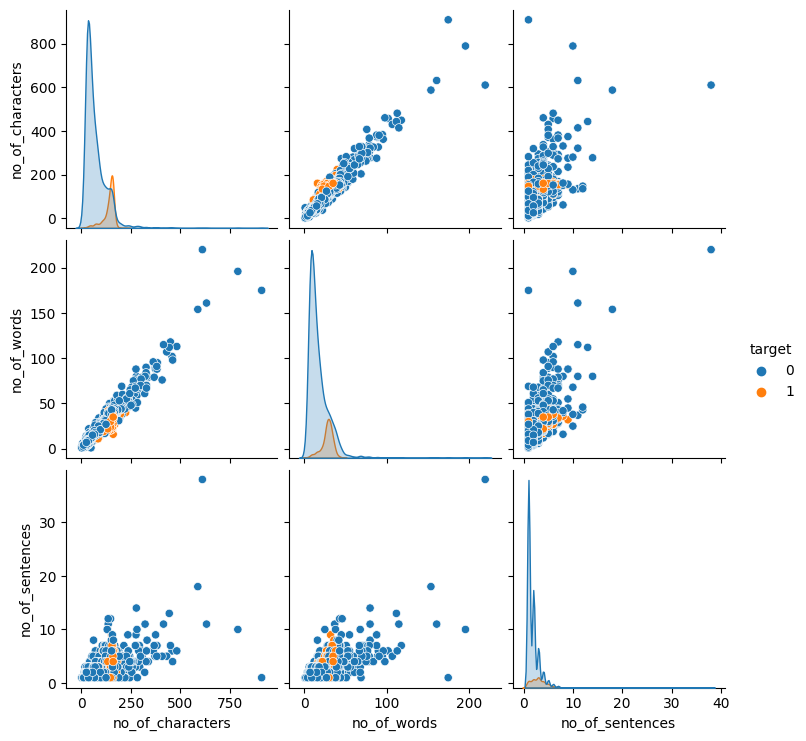

In [94]:
sns.pairplot(df,hue= 'target')

In [95]:
a = df.corr(numeric_only=True)
a

,target,no_of_characters,no_of_words,no_of_sentences
target,1.000000,0.384717,0.262912,0.263939
no_of_characters,0.384717,1.000000,0.965760,0.624139
no_of_words,0.262912,0.965760,1.000000,0.679971
no_of_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

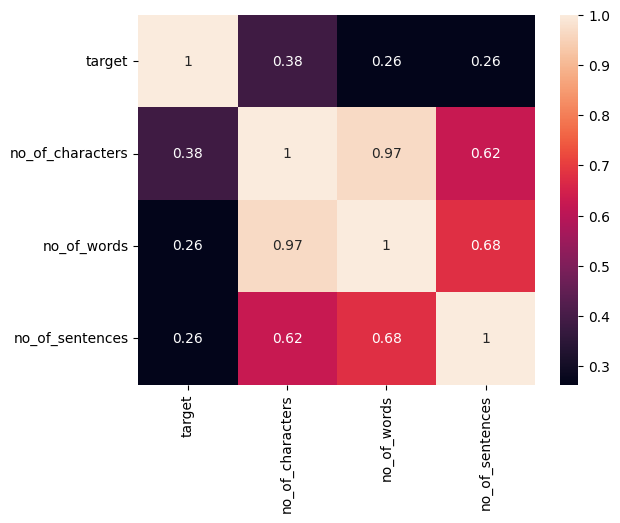

In [96]:
sns.heatmap(a,annot= True)

### 3. Data Preprocessing

#### Lower case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation
#### Stemming

In [97]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [98]:
#LOWERCASE CONVERTING
def to_lower(text):
    text = text.lower()
    return text

In [99]:
#TOKENIZATION
def tokenize(text):
    words = nltk.word_tokenize(text)
    return words

In [100]:
#REMOVE NONALPHANUMERIC
def remove_non_alphnum(words):
    y = []
    for i in words:
        if i.isalnum():
            y.append(i)

    return y

In [101]:
# Step 4: REMOVE STOPWORDS + PUNCTUATION
def removes_stop_punc(words):
    y = []
    for  i in words:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return y

In [102]:
# Step 5: STEMMING
ps = PorterStemmer()

def stem_words(words):
    y = []
    for i in words:
        y.append(ps.stem(i))
    return y

In [103]:
sample = "Hello!!! How are you doing??? I am LOVING Python Coding."

# Step by step
text = to_lower(sample)
tokens = tokenize(text)
tokens = remove_non_alphnum(tokens)
tokens = removes_stop_punc(tokens)
tokens = stem_words(tokens)

print(" ".join(tokens))

hello love python code


In [104]:
#Making Pipeline
def full_pipeline(text):
    text = to_lower(text)
    tokens = tokenize(text)
    tokens = remove_non_alphnum(tokens)
    tokens = removes_stop_punc(tokens)
    tokens = stem_words(tokens)
    return " ".join(tokens)

In [105]:
df['transformed_text'] = df['text'].apply(full_pipeline)

In [106]:
df.head(4)

,target,text,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [107]:
#most frequent word counts dikhnae ke liye
from wordcloud import WordCloud
wc = WordCloud(width= 500,height= 500,min_font_size= 10,background_color= 'white')

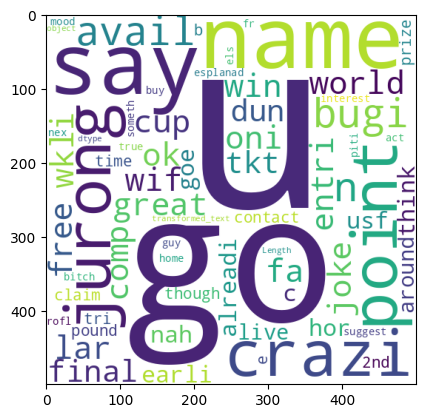

In [108]:
y = str(df['transformed_text'])   #series column ko string me change krna   
#woh column hona chhaiye jisme string ho

#steps phle generate kro then show kro
word_cloud = wc.generate(y) 
plt.imshow(word_cloud)

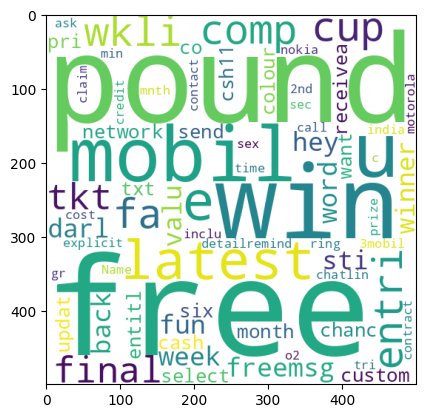

In [109]:
#agr ham or spam ke individualy dekhne ho
mask1 = df['target'] == 1
mask2 = str(df[mask1]['transformed_text'])
spam_wc = wc.generate(mask2)
plt.imshow(spam_wc)

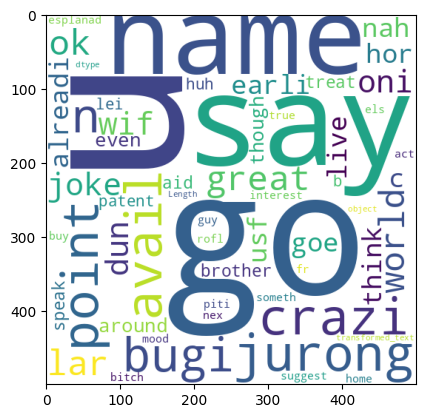

In [110]:
#agr ham or spam ke individualy dekhne ho
mask3 = df['target'] == 0   #selecting rows where ham
mask4 = str(df[mask3]['transformed_text'])  #selecting transformed_column
ham_wc = wc.generate(mask4)    #generating the 
plt.imshow(ham_wc)

In [111]:
#Finding most 30 frequent words of spam
spam_mask = df['target'] == 1  #filter the spam rows 
x = df[spam_mask]['transformed_text']  #extracting transformed text column

print(type(x))   #converting to single list
spam_list = x.tolist()   #conversion to single list

print(type(spam_list))
#spam_list     #list of sentences containg string

<class 'pandas.core.series.Series'>
<class 'list'>


In [112]:
spam_corpus = []
for i in spam_list:
    #print(i)
    words = i.split()   #list of words
    for j in words:     #ek list me traverse 
        spam_corpus.append(j)

#spam_corpus
print(len(spam_corpus))

9939


In [113]:
from collections import Counter  #count btayega each word ka list ke

#applying Counter on spam_corpus list
#Counter(spam_corpus)

b = Counter(spam_corpus).most_common(20)   #most 10 common nikallenge
b

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57)]

In [114]:
#plotting on graph 
spam_df = pd.DataFrame(b)
spam_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


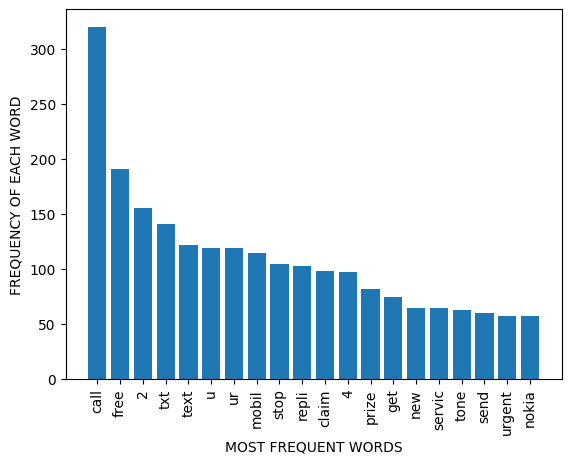

In [115]:
x1 = spam_df[0]
y1 = spam_df[1]
plt.bar(x1,y1)
plt.xticks(rotation= 'vertical')
plt.xlabel("MOST FREQUENT WORDS")
plt.ylabel("FREQUENCY OF EACH WORD")
plt.show()

In [116]:
ham_mask = df['target'] == 0  #filter the spam rows 
var = df[ham_mask]['transformed_text']  #extracting transformed text column

#print(type(var))   #converting to single list
ham_list = var.tolist()   #conversion to single list

#print(type(spam_list))
#ham_list     #list of sentences containg string

ham_corpus = []
for i in ham_list:
    #print(i)
    words = i.split()   #list of words
    for j in words:     #ek list me traverse 
        ham_corpus.append(j)

#spam_corpus
print(len(ham_corpus))

c = Counter(ham_corpus).most_common(20)   #most 10 common nikallenge
c

35404


[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165)]

In [117]:
#plotting on graph 
ham_df = pd.DataFrame(c)
ham_df

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


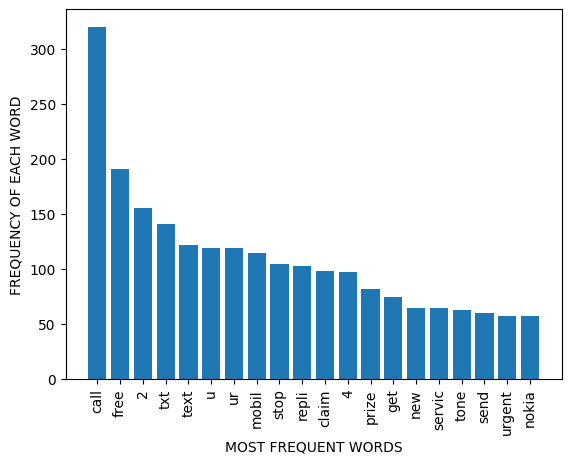

In [118]:
x2 = spam_df[0]
y2 = spam_df[1]
plt.bar(x2,y2)
plt.xticks(rotation= 'vertical')
plt.xlabel("MOST FREQUENT WORDS")
plt.ylabel("FREQUENCY OF EACH WORD")
plt.show()

In [119]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### TEXT VECTORIZATION

In [120]:
#converting text to vectors so we can apply ml algorithms
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [125]:
X = cv.fit_transform(df['transformed_text']).toarray()


print(X.shape)

(5169, 6708)


In [126]:
y = df['target'].values
print(y)
print(y.shape)

[0 0 1 ... 0 0 0]
(5169,)


In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify= y,random_state= 2)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [130]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB  #Naive Bayes Classifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score  #evaluation metrics

In [131]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [133]:
print("FOR GNB USING COUNT_VECTORIZER")
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print()
print(confusion_matrix(y_test,y_pred1))
print()
print(precision_score(y_test,y_pred1))

FOR GNB
0.879110251450677

[[789 114]
 [ 11 120]]

0.5128205128205128


In [135]:
print("FOR MNB USING COUNT_VECTORIZER")
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print()
print(confusion_matrix(y_test,y_pred2))
print()
print(precision_score(y_test,y_pred2))

FOR MNB
0.9709864603481625

[[879  24]
 [  6 125]]

0.8389261744966443


In [137]:
print("FOR BNB USING COUNT_VECTORIZER")
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print()
print(confusion_matrix(y_test,y_pred3))
print()
print(precision_score(y_test,y_pred3))

FOR BNB
0.97678916827853

[[901   2]
 [ 22 109]]

0.9819819819819819


In [141]:
#FOR TFIDF MODEL
X2 = tfidf.fit_transform(df['transformed_text']).toarray()
y2 = df['target'].values

X_tf_id_train,X_tf_id_test,y_tf_id_train,y_tf_id_test = train_test_split(X2,y2,test_size = 0.2,stratify= y,random_state= 2)

In [142]:
#APPLYING FOR TFIDF MODEL
print("FOR GNB USING TF_IDF")
gnb.fit(X_train,y_train)
y_pred4 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print()
print(confusion_matrix(y_test,y_pred4))
print()
print(precision_score(y_test,y_pred4))


FOR GNB USING TF_IDF
0.8771760154738878

[[790 113]
 [ 14 117]]

0.508695652173913


In [144]:
print("FOR MNB USING USING TF_IDF")
mnb.fit(X_train,y_train)
y_pred5 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print()
print(confusion_matrix(y_test,y_pred5))
print()
print(precision_score(y_test,y_pred5))

FOR MNB USING USING TF_IDF
0.9671179883945842

[[903   0]
 [ 34  97]]

1.0


In [146]:
print("FOR BNB USING USING TF_IDF")
bnb.fit(X_train,y_train)
y_pred6 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred6))
print()
print(confusion_matrix(y_test,y_pred6))
print()
print(precision_score(y_test,y_pred6))

FOR BNB USING USING TF_IDF
0.97678916827853

[[901   2]
 [ 22 109]]

0.9819819819819819


In [ ]:
#choosing multinomial NB In tfidf 

In [150]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))